# Matplotlib

<div align="center"><img src="https://raw.githubusercontent.com/eitanlees/ISC-3313/master/Lectures/Week-06/images/mpl.png" width="45%"/></div>

We'll now take an in-depth look at the Matplotlib package for visualization in Python.

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.

Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.

Checkout the [Matplotlib example gallery](https://matplotlib.org/gallery.html) for many many examples

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy  we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.

Here we will set the ``default`` style, which ensures that the plots we create use the default Matplotlib style:

In [2]:
plt.style.use('default')

There are many styles includes in matplotlib. 

See [Matplotlib Style Gallery - Tony S. Yu](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

In [3]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

Throughout this section, we will adjust this style as needed.

Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.

We will explore two method for visualization. 

1. Creating plots in a script
2. Creating plots in a Jupyter Notebook

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.

``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.

The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.

Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython notebook

Plotting  within an Jupyter notebook can be done with the ``%matplotlib`` magic command

- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

In [4]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

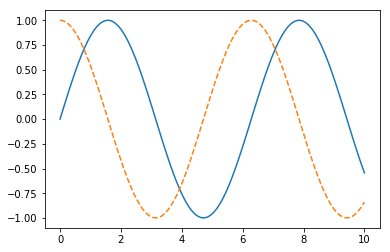

In [5]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [6]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [7]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.

Here we will take a first look at creating a simple plot of this type.

Let's start with a simple sinusoid:

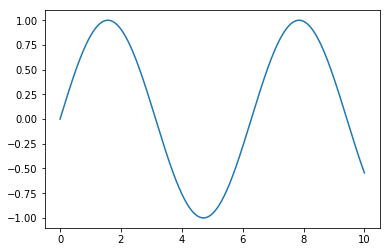

In [8]:
x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

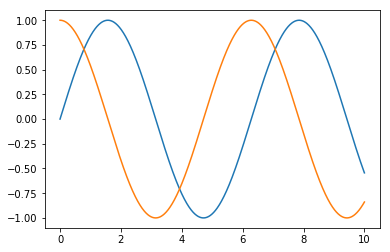

In [9]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!

We'll now dive into some more details about how to control the appearance of the axes and lines.

## Exercise

Create a plot of the function 

$$f(x) = cos(ax)\cdot e^{-bx}$$

on the domain $x = [0, 5]$ with $a=2$ and $b=0.5$ . 

On the same figure plot $a=3$ and $b=0.7$.

Try also creating a standalone python script which creates the same figure. 

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.

The ``plt.plot()`` function takes additional arguments that can be used to specify these.

To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.

The color can be specified in a variety of ways:

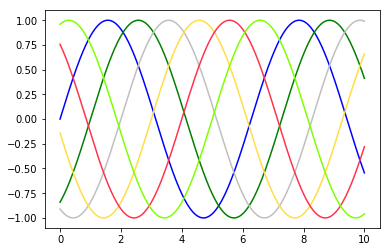

In [10]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of [default colors](https://matplotlib.org/users/dflt_style_changes.html#colors-in-default-property-cycle) for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

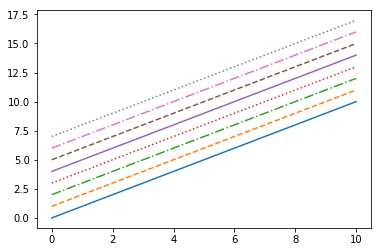

In [11]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

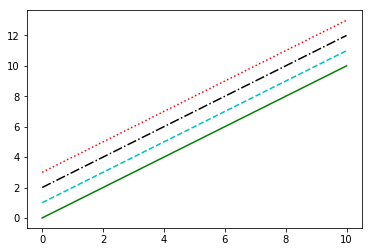

In [12]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the ``plt.plot`` function using the `help()` function.

## Exercise

Create a plot of your choosing with three different lines styles and three user specified colors. 

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.

The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

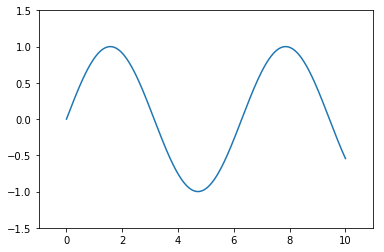

In [13]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

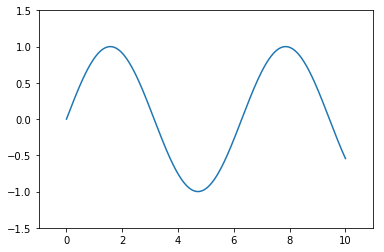

In [14]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

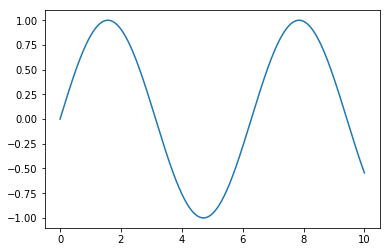

In [15]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

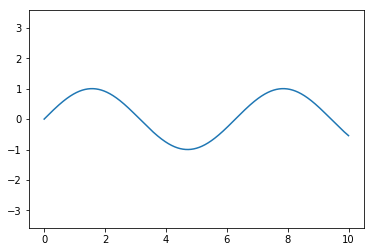

In [16]:
plt.plot(x, np.sin(x))
plt.axis('equal');

## Labeling Plots

We'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

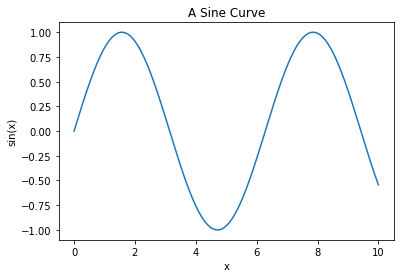

In [17]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.


Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.

Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

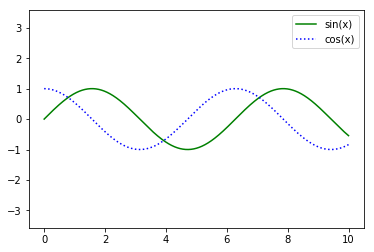

In [18]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.

## Exercise

The Lennard-Jones potential approximates the interaction between a pair of neutral atoms. 

$$
V = 4\varepsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]
$$


Create a plot of $V$ with respect to $r$ on the domain $[0.95, 3]$. 

Set $\varepsilon = 1$ and $\sigma = 1$ as well as $1.5$

Give your plot labels, a title, and set the y limits between $[-2,2]$. Change the default color and line style. 

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.

Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

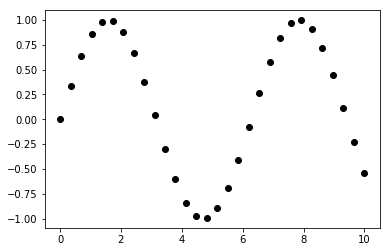

In [19]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. 

Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. 

The full list of available symbols can be seen in the documentation of ``plt.plot``, or in [Matplotlib's online documentation](https://matplotlib.org/api/markers_api.html) but a few useful ones are

* 'o' - points plotted as circles
* 's' - points plotted as squares
* '^' - points plotted as triangles
* '.' - points plotted as dots

Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

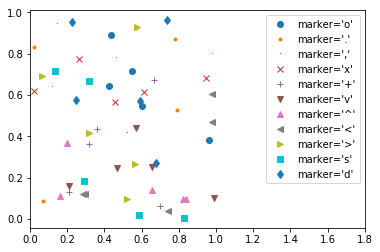

In [20]:
np.random.seed(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    # Create 5 random number pairs
    r = np.random.rand(5, 2)
    # Plot with different markers
    plt.plot(r[:, 0], r[:, 1], marker, label=f"marker='{marker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

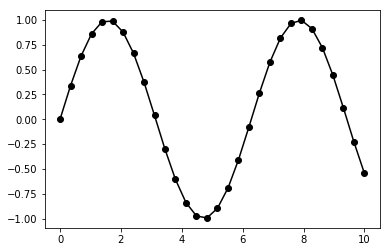

In [21]:
plt.plot(x, y, '-ok');

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

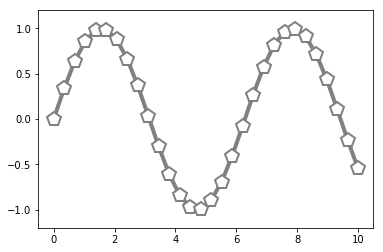

In [22]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.


## Exercise

Plot the data:

| x | y  |
|---|----|
| 1 | 50 | 
| 2 | 60 |
| 4 | 40 | 
| 6 | 30 |
| 10| 40 |

Color the data points with red triangles and connect them with dashed lines. 

Make the yaxis range from 20 to 80. 

Add a title and axis labels.